# Matrix Multiplication: Problems



## Problem3: Solving Systems of Linear Equations

3.1 Basic system:
Solve the following system of linear equations:
2x + y - z = 8
-3x - y + 2z = -11
-2x + y + 2z = -3

3.2 Underdetermined system:
Investigate the solutions of the following system:
x + y + z = 6
y + z = 3

3.3 Overdetermined system:
Find the best approximation for the following system:
x + y = 2
x + 2y = 4
x + 3y = 5

3.4 Visualizing the solution of a 2D system:
Solve and visualize the following system:
2x + y = 4
x + 3y = 5

3.5 Solving a larger system:
Generate a random 10x10 system of linear equations and solve it. Compare the solution with the true values.

## Problem6: Matrix Factorization for Recommender Systems

Consider the following user-item rating matrix:

R = np.array([
    [5, 3, 0, 1],
    [4, 0, 0, 1],
    [1, 1, 0, 5],
    [1, 0, 0, 4],
    [0, 1, 5, 4],
])

6.1 Basic matrix factorization:
Implement a matrix factorization algorithm to reconstruct this rating matrix using 2 latent factors.

6.2 Handling missing values:
Treat the zero values in the matrix as missing data. How does this affect the factorization?

6.3 Visualizing latent factors:
After performing the factorization, visualize the user and item latent factors.

6.4 Making recommendations:
Use the factorized matrices to make top 3 recommendations for User 2 (the third row in the matrix).

6.5 Effect of number of latent factors:
Investigate how the number of latent factors (K = 1, 2, 3, 4, 5) affects the reconstruction error.

For each sub-problem, write the necessary code to solve it and explain your approach.

In [ ]:
# Matrix Multiplication: Answers

import numpy as np
import matplotlib.pyplot as plt

## Problem 3: Solving Systems of Linear Equations

def solve_linear_system(A, b):
    return np.linalg.solve(A, b)

# 3.1 Basic system
A1 = np.array([[2, 1, -1],
               [-3, -1, 2],
               [-2, 1, 2]])
b1 = np.array([8, -11, -3])

solution1 = solve_linear_system(A1, b1)

print("3.1 Basic System:")
print("Solution x:", solution1)
print("Verification (A * x):", np.dot(A1, solution1))

# 3.2 Underdetermined system
A2 = np.array([[1, 1, 1],
               [0, 1, 1]])
b2 = np.array([6, 3])

print("\n3.2 Underdetermined System:")
try:
    solution2 = np.linalg.lstsq(A2, b2, rcond=None)[0]
    print("Least squares solution x:", solution2)
    print("Verification (A * x):", np.dot(A2, solution2))
except np.linalg.LinAlgError:
    print("This system has infinitely many solutions.")

# 3.3 Overdetermined system
A3 = np.array([[1, 1],
               [1, 2],
               [1, 3]])
b3 = np.array([2, 4, 5])

print("\n3.3 Overdetermined System:")
solution3 = np.linalg.lstsq(A3, b3, rcond=None)[0]
print("Least squares solution x:", solution3)
print("Verification (A * x):", np.dot(A3, solution3))

# 3.4 Visualizing the solution of a 2D system
A4 = np.array([[2, 1],
               [1, 3]])
b4 = np.array([4, 5])

solution4 = solve_linear_system(A4, b4)

print("\n3.4 2D System for Visualization:")
print("Solution x:", solution4)

x = np.linspace(-1, 5, 100)
y1 = (4 - 2*x) / 1  # First equation: 2x + y = 4
y2 = (5 - x) / 3    # Second equation: x + 3y = 5

plt.figure(figsize=(10, 8))
plt.plot(x, y1, label='2x + y = 4')
plt.plot(x, y2, label='x + 3y = 5')
plt.plot(solution4[0], solution4[1], 'ro', label='Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphical Solution of the System of Linear Equations')
plt.legend()
plt.grid(True)
plt.show()

# 3.5 Solving a larger system
n = 10
A5 = np.random.rand(n, n)
x_true = np.random.rand(n)
b5 = np.dot(A5, x_true)

solution5 = solve_linear_system(A5, b5)

print("\n3.5 Larger System (10x10):")
print("True solution:", x_true)
print("Computed solution:", solution5)
print("Maximum absolute error:", np.max(np.abs(x_true - solution5)))

## Problem 6: Matrix Factorization for Recommender Systems

def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:], Q[:,j])
                    for k in range(K):
                        P[i][k] += alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] += alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e += pow(R[i][j] - np.dot(P[i,:], Q[:,j]), 2)
                    for k in range(K):
                        e += (beta/2) * (pow(P[i][k], 2) + pow(Q[k][j], 2))
        if e < 0.001:
            break
    return P, Q.T

R = np.array([
    [5, 3, 0, 1],
    [4, 0, 0, 1],
    [1, 1, 0, 5],
    [1, 0, 0, 4],
    [0, 1, 5, 4],
])

# 6.1 Basic matrix factorization
N, M = R.shape
K = 2

P = np.random.rand(N, K)
Q = np.random.rand(M, K)

nP, nQ = matrix_factorization(R, P, Q, K)
nR = np.dot(nP, nQ.T)

print("\n6.1 Basic Matrix Factorization:")
print("Original Rating Matrix:")
print(R)
print("\nReconstructed Rating Matrix:")
print(nR)
print("\nMean Squared Error:", np.mean((R - nR) ** 2))

# 6.2 Handling missing values
R_missing = R.copy()
R_missing[R_missing == 0] = np.nan

P = np.random.rand(N, K)
Q = np.random.rand(M, K)

nP, nQ = matrix_factorization(R, P, Q, K)
nR = np.dot(nP, nQ.T)

print("\n6.2 Handling Missing Values:")
print("Original Rating Matrix with Missing Values:")
print(R_missing)
print("\nReconstructed Rating Matrix:")
print(nR)

mse = np.nanmean((R_missing - nR) ** 2)
print("\nMean Squared Error (for non-missing values):", mse)

# 6.3 Visualizing latent factors
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.imshow(nP, cmap='viridis', aspect='auto')
plt.title('User Latent Factors')
plt.xlabel('Latent Factors')
plt.ylabel('Users')
plt.colorbar()

plt.subplot(122)
plt.imshow(nQ.T, cmap='viridis', aspect='auto')
plt.title('Item Latent Factors')
plt.xlabel('Latent Factors')
plt.ylabel('Items')
plt.colorbar()

plt.tight_layout()
plt.show()

# 6.4 Making recommendations
user_id = 2  # Example user
user_ratings = R[user_id]
user_latent = nP[user_id]

# Predict ratings for all items
predicted_ratings = np.dot(user_latent, nQ.T)

# Find top 3 recommended items (excluding already rated items)
rated_items = np.where(user_ratings > 0)[0]
unrated_items = np.where(user_ratings == 0)[0]
top_recommendations = unrated_items[np.argsort(predicted_ratings[unrated_items])[-3:][::-1]]

print(f"\n6.4 Top 3 Recommendations for User {user_id}:")
for item in top_recommendations:
    print(f"Item {item}: Predicted Rating {predicted_ratings[item]:.2f}")

# 6.5 Effect of number of latent factors
K_values = [1, 2, 3, 4, 5]
mse_values = []

for K in K_values:
    P = np.random.rand(N, K)
    Q = np.random.rand(M, K)
    nP, nQ = matrix_factorization(R, P, Q, K)
    nR = np.dot(nP, nQ.T)
    mse = np.mean((R - nR) ** 2)
    mse_values.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(K_values, mse_values, marker='o')
plt.xlabel('Number of Latent Factors (K)')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Number of Latent Factors on Reconstruction Error')
plt.grid(True)
plt.show()

print("\n6.5 Effect of Number of Latent Factors:")
for K, mse in zip(K_values, mse_values):
    print(f"K = {K}: MSE = {mse:.4f}")

Practice Problem.

Problem 1 Results:
Pure Python result: [[58, 64], [139, 154]]
NumPy result:
 [[ 58  64]
 [139 154]]
Pure Python time: 0.000005 seconds
NumPy time: 0.000007 seconds
NumPy is 0.76 times faster

Problem 2 Results:
Minimum number of multiplications: 4500
Optimal parenthesization: ((A0A1)A2)

Problem 3 Results:
Solution to the system of linear equations:
[ 2.  3. -1.]
Verification (should be close to b):
[  8. -11.  -3.]

Problem 4 Results:
Original Image:
[[0.07674197 0.92551624 0.71769929 0.68268638 0.85168231 0.04701061
  0.22542841 0.57043377 0.14685444 0.22183177]
 [0.40566252 0.62857235 0.79680907 0.73705097 0.28162706 0.59753074
  0.43449192 0.18570291 0.40027151 0.04151617]
 [0.65929408 0.16302489 0.28413337 0.25848983 0.80200204 0.9832609
  0.07901002 0.99957806 0.09973283 0.04050629]
 [0.05804666 0.03904076 0.12739812 0.57570821 0.60936418 0.71542279
  0.7101802  0.68201824 0.51694377 0.03284486]
 [0.84460262 0.85775478 0.76818547 0.59632562 0.2456146  0.33445163
  0.70625263 0.18

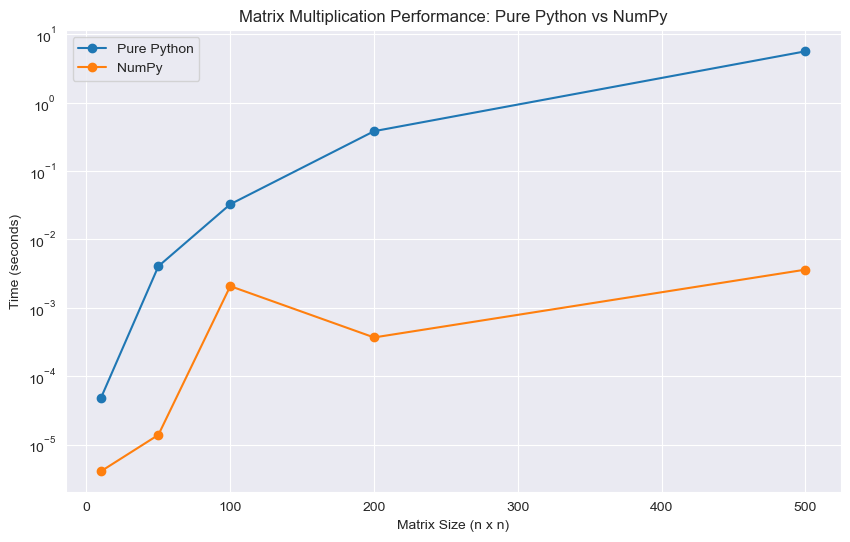

In [1]:
# Matrix Multiplication: Practice Problems

import numpy as np
import time
import matplotlib.pyplot as plt

# Helper function for pure Python matrix multiplication
def matrix_multiply_python(A, B):
    if len(A[0]) != len(B):
        raise ValueError("Matrix dimensions are not compatible for multiplication")
    
    result = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]
    
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    
    return result

## Problem 1: Basic Matrix Multiplication
# Implement matrix multiplication using both pure Python and NumPy.
# Compare the results and execution time.

def problem_1():
    A = [[1, 2, 3],
         [4, 5, 6]]
    B = [[7, 8],
         [9, 10],
         [11, 12]]
    
    # Pure Python implementation
    start_time = time.time()
    result_python = matrix_multiply_python(A, B)
    python_time = time.time() - start_time
    
    # NumPy implementation
    A_np = np.array(A)
    B_np = np.array(B)
    start_time = time.time()
    result_numpy = np.dot(A_np, B_np)
    numpy_time = time.time() - start_time
    
    print("Problem 1 Results:")
    print("Pure Python result:", result_python)
    print("NumPy result:\n", result_numpy)
    print(f"Pure Python time: {python_time:.6f} seconds")
    print(f"NumPy time: {numpy_time:.6f} seconds")
    print(f"NumPy is {python_time / numpy_time:.2f} times faster")

problem_1()

## Problem 2: Matrix Chain Multiplication
# Given a list of matrices, find the most efficient way to multiply them together.
# Implement this using dynamic programming.

def matrix_chain_order(dimensions):
    n = len(dimensions) - 1
    m = [[0 for _ in range(n)] for _ in range(n)]
    s = [[0 for _ in range(n)] for _ in range(n)]

    for chain_length in range(2, n + 1):
        for i in range(n - chain_length + 1):
            j = i + chain_length - 1
            m[i][j] = float('inf')
            for k in range(i, j):
                cost = m[i][k] + m[k+1][j] + dimensions[i] * dimensions[k+1] * dimensions[j+1]
                if cost < m[i][j]:
                    m[i][j] = cost
                    s[i][j] = k

    return m, s

def print_optimal_parens(s, i, j):
    if i == j:
        print(f"A{i}", end="")
    else:
        print("(", end="")
        print_optimal_parens(s, i, s[i][j])
        print_optimal_parens(s, s[i][j] + 1, j)
        print(")", end="")

def problem_2():
    dimensions = [10, 30, 5, 60]
    m, s = matrix_chain_order(dimensions)
    
    print("\nProblem 2 Results:")
    print("Minimum number of multiplications:", m[0][-1])
    print("Optimal parenthesization: ", end="")
    print_optimal_parens(s, 0, len(dimensions) - 2)
    print()

problem_2()

## Problem 3: Solving Systems of Linear Equations
# Implement a function to solve a system of linear equations using
# matrix multiplication and inversion.

def solve_linear_system(A, b):
    A_inv = np.linalg.inv(A)
    return np.dot(A_inv, b)

def problem_3():
    A = np.array([[2, 1, -1],
                  [-3, -1, 2],
                  [-2, 1, 2]])
    b = np.array([8, -11, -3])
    
    solution = solve_linear_system(A, b)
    
    print("\nProblem 3 Results:")
    print("Solution to the system of linear equations:")
    print(solution)
    
    # Verify the solution
    print("Verification (should be close to b):")
    print(np.dot(A, solution))

problem_3()

## Problem 4: Image Convolution
# Implement a 2D convolution function for image processing.

def convolve2d(image, kernel):
    m, n = kernel.shape
    y, x = image.shape
    y = y - m + 1
    x = x - n + 1
    new_image = np.zeros((y,x))
    for i in range(y):
        for j in range(x):
            new_image[i][j] = np.sum(image[i:i+m, j:j+n]*kernel)
    return new_image

def problem_4():
    # Create a simple image
    image = np.random.rand(10, 10)
    
    # Define a simple edge detection kernel
    kernel = np.array([[-1, -1, -1],
                       [-1,  8, -1],
                       [-1, -1, -1]])
    
    # Apply convolution
    result = convolve2d(image, kernel)
    
    print("\nProblem 4 Results:")
    print("Original Image:")
    print(image)
    print("\nConvolved Image (Edge Detection):")
    print(result)

problem_4()

## Problem 5: PageRank Algorithm
# Implement the PageRank algorithm using matrix multiplication.

def pagerank(adj_matrix, damping=0.85, epsilon=1.0e-8):
    n = adj_matrix.shape[0]
    out_degree = np.sum(adj_matrix, axis=1)
    adj_matrix = adj_matrix / out_degree[:, np.newaxis]
    
    pagerank = np.ones(n) / n
    prev_pagerank = np.zeros(n)
    
    while np.sum(np.abs(pagerank - prev_pagerank)) > epsilon:
        prev_pagerank = pagerank.copy()
        pagerank = (1 - damping) / n + damping * adj_matrix.T.dot(prev_pagerank)
    
    return pagerank

def problem_5():
    # Create a simple adjacency matrix for a small graph
    adj_matrix = np.array([[0, 1, 1, 0],
                           [0, 0, 1, 0],
                           [1, 0, 0, 1],
                           [0, 0, 1, 0]])
    
    pr = pagerank(adj_matrix)
    
    print("\nProblem 5 Results:")
    print("PageRank values:")
    for i, value in enumerate(pr):
        print(f"Node {i}: {value:.4f}")

problem_5()

## Problem 6: Matrix Factorization for Recommender Systems
# Implement a simple matrix factorization algorithm for collaborative filtering.

def matrix_factorization(R, P, Q, K, steps=1000, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:], Q[:,j])
                    for k in range(K):
                        P[i][k] += alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] += alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e += pow(R[i][j] - np.dot(P[i,:], Q[:,j]), 2)
                    for k in range(K):
                        e += (beta/2) * (pow(P[i][k], 2) + pow(Q[k][j], 2))
        if e < 0.001:
            break
    return P, Q.T

def problem_6():
    R = np.array([
        [5, 3, 0, 1],
        [4, 0, 0, 1],
        [1, 1, 0, 5],
        [1, 0, 0, 4],
        [0, 1, 5, 4],
    ])

    N = len(R)
    M = len(R[0])
    K = 2

    P = np.random.rand(N, K)
    Q = np.random.rand(M, K)

    nP, nQ = matrix_factorization(R, P, Q, K)
    nR = np.dot(nP, nQ.T)

    print("\nProblem 6 Results:")
    print("Original Rating Matrix:")
    print(R)
    print("\nReconstructed Rating Matrix:")
    print(nR)

problem_6()

## Problem 7: Economic Input-Output Analysis
# Implement the Leontief input-output model using matrix operations.

def leontief_inverse(A):
    n = A.shape[0]
    I = np.eye(n)
    return np.linalg.inv(I - A)

def calculate_total_production(A, d):
    L = leontief_inverse(A)
    return np.dot(L, d)

def problem_7():
    # Example economy with 3 sectors
    A = np.array([
        [0.1, 0.2, 0.3],
        [0.3, 0.1, 0.2],
        [0.2, 0.3, 0.1]
    ])

    # Final demand
    d = np.array([100, 200, 150])

    x = calculate_total_production(A, d)

    print("\nProblem 7 Results:")
    print("Technical coefficients matrix (A):")
    print(A)
    print("\nFinal demand (d):", d)
    print("Total production (x):", x)

problem_7()

## Problem 8: Performance Analysis
# Compare the performance of matrix multiplication for different matrix sizes
# using both pure Python and NumPy implementations.

def problem_8():
    sizes = [10, 50, 100, 200, 500]
    python_times = []
    numpy_times = []

    for n in sizes:
        A = np.random.rand(n, n)
        B = np.random.rand(n, n)
        
        A_list = A.tolist()
        B_list = B.tolist()
        
        # Time pure Python implementation
        start = time.time()
        matrix_multiply_python(A_list, B_list)
        python_time = time.time() - start
        python_times.append(python_time)
        
        # Time NumPy implementation
        start = time.time()
        np.dot(A, B)
        numpy_time = time.time() - start
        numpy_times.append(numpy_time)
        
        print(f"Matrix size: {n}x{n}")
        print(f"Pure Python time: {python_time:.6f} seconds")
        print(f"NumPy time: {numpy_time:.6f} seconds")
        print(f"NumPy is {python_time / numpy_time:.2f} times faster")
        print()
    
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, python_times, marker='o', label='Pure Python')
    plt.plot(sizes, numpy_times, marker='o', label='NumPy')
    plt.xlabel('Matrix Size (n x n)')
    plt.ylabel('Time (seconds)')
    plt.title('Matrix Multiplication Performance: Pure Python vs NumPy')
    plt.legend()
    plt.yscale('log')
    plt.grid(True)
    plt.show()

print("\nProblem 8 Results:")
problem_8()

# Matrix Multiplication: Problems with Economic Focus

import numpy as np

## Problem 7: Input-Output Analysis

Consider the following input-output table for a three-sector economy (Agriculture, Manufacturing, Services):

| Sector       | Agriculture | Manufacturing | Services | Final Demand |
|--------------|-------------|----------------|----------|--------------|
| Agriculture  | 20          | 10             | 40       | 130          |
| Manufacturing| 30          | 50             | 30       | 90           |
| Services     | 50          | 40             | 60       | 150          |

7.1 Create the technical coefficients matrix A.

7.2 Calculate the Leontief inverse matrix (I - A)^(-1).

7.3 If the final demand for agricultural products increases by 50 units, what will be the total effect on output in each sector?

7.4 Calculate the output multipliers for each sector.

## Problem 8: Comparative Advantage and Trade

Consider two countries (A and B) that can produce two goods (X and Y). The production possibilities for one unit of labor in each country are:

| Country | Good X | Good Y |
|---------|--------|--------|
| A       | 3      | 2      |
| B       | 2      | 4      |

8.1 Create a matrix representing the production possibilities.

8.2 Calculate the opportunity cost of producing each good in each country.

8.3 Determine which country has a comparative advantage in producing each good.

8.4 If the countries decide to specialize and trade, calculate the potential gains from trade if Country A has 100 units of labor and Country B has 150 units of labor.

## Problem 9: Economic Growth Model

Consider a simple Solow growth model with the following parameters:
- Savings rate (s) = 0.2
- Depreciation rate (δ) = 0.1
- Population growth rate (n) = 0.02
- Technological progress rate (g) = 0.03
- Capital share in production (α) = 0.3

9.1 Create a matrix to represent the model's parameters.

9.2 Calculate the steady-state capital-to-effective-labor ratio (k*).

9.3 If the current capital-to-effective-labor ratio is 80% of the steady-state value, calculate the growth rate of capital per effective worker.

9.4 Project the capital-to-effective-labor ratio for the next 5 periods, starting from the current ratio calculated in 9.3.

## Problem 10: Consumption and Income Distribution

Consider an economy with three income groups (Low, Medium, High) and three consumption categories (Necessities, Normal Goods, Luxury Goods). The consumption patterns are represented by the following matrix:

| Income Group | Necessities | Normal Goods | Luxury Goods |
|--------------|-------------|--------------|--------------|
| Low          | 0.6         | 0.3          | 0.1          |
| Medium       | 0.4         | 0.4          | 0.2          |
| High         | 0.2         | 0.3          | 0.5          |

10.1 Create a matrix C representing the consumption patterns.

10.2 If the total income distribution is [1000, 2000, 3000] for Low, Medium, and High income groups respectively, calculate the total consumption in each category.

10.3 Calculate the income elasticity of demand for each consumption category, assuming a 10% increase in income for all groups.

10.4 Project the change in consumption patterns if the income distribution shifts to [800, 2200, 3000] due to economic policies.

For each problem, write the necessary code to solve it and explain your approach and economic interpretation of the results.

7.1 Technical coefficients matrix A:
[[0.1        0.05       0.13333333]
 [0.15       0.25       0.1       ]
 [0.25       0.2        0.2       ]]

7.2 Leontief inverse matrix:
[[1.19402985 0.13724481 0.21616058]
 [0.29850746 1.41362155 0.22645394]
 [0.44776119 0.39629439 1.37416366]]

7.3 Change in output due to increase in agricultural final demand:
[59.70149254 14.92537313 22.3880597 ]

7.4 Output multipliers:
[1.94029851 1.94716075 1.81677818]

Interpretation:
- The technical coefficients matrix A shows the input requirements from each sector to produce one unit of output in another sector.
- The Leontief inverse captures both direct and indirect effects of changes in final demand.
- An increase of 50 units in agricultural final demand leads to increases in all sectors' output, with the largest effect on agriculture itself.
- Output multipliers indicate the total impact on the economy of a unit increase in final demand for each sector's output.

8.1 Production possibilities matrix:


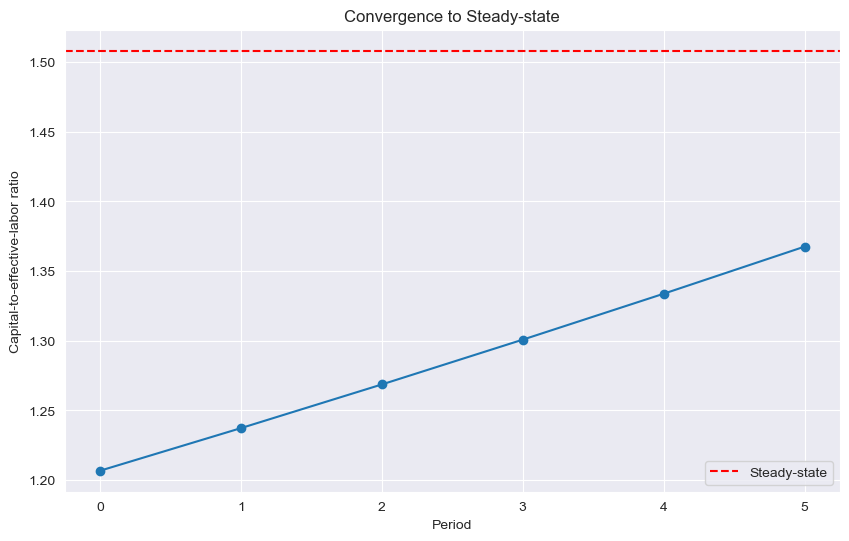


Interpretation:
- The Solow model parameters determine the long-run equilibrium of the economy.
- The steady-state capital-to-effective-labor ratio represents the long-run equilibrium level of capital intensity.
- When below the steady-state, the economy experiences faster growth as it converges to the long-run equilibrium.
- The projection shows how the economy approaches its steady-state over time.

10.1 Consumption patterns matrix:
[[0.6 0.3 0.1]
 [0.4 0.4 0.2]
 [0.2 0.3 0.5]]

10.2 Total consumption in each category:
Necessities: 2000.0
Normal Goods: 2000.0
Luxury Goods: 2000.0

10.3 Income elasticity of demand:
Necessities: 1.00
Normal Goods: 1.00
Luxury Goods: 1.00

10.4 Change in consumption patterns:
Necessities: -40.00
Normal Goods: 20.00
Luxury Goods: 20.00


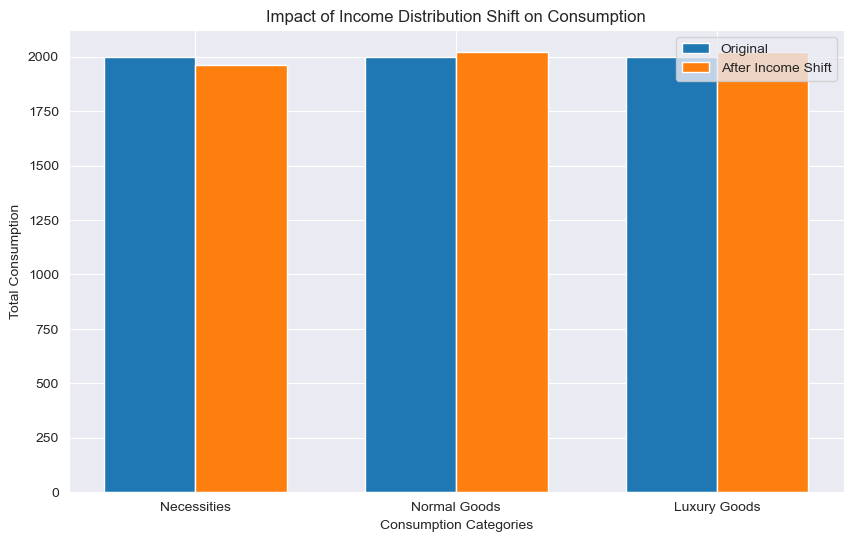


Interpretation:
- The consumption patterns matrix shows how different income groups allocate their spending across categories.
- Total consumption calculations reveal the aggregate demand for each category of goods.
- Income elasticity of demand indicates how responsive consumption is to changes in income:
  * Elasticity < 1: Necessity goods
  * Elasticity ≈ 1: Normal goods
  * Elasticity > 1: Luxury goods
- The income distribution shift leads to changes in overall consumption patterns, reflecting the different spending habits of income groups.


In [2]:
# Matrix Multiplication: Answers with Economic Focus

import numpy as np
import matplotlib.pyplot as plt

## Problem 7: Input-Output Analysis

# 7.1 Create the technical coefficients matrix A
total_output = np.array([200, 200, 300])
transactions = np.array([
    [20, 10, 40],
    [30, 50, 30],
    [50, 40, 60]
])

A = transactions / total_output
print("7.1 Technical coefficients matrix A:")
print(A)

# 7.2 Calculate the Leontief inverse matrix
I = np.eye(3)
leontief_inverse = np.linalg.inv(I - A)
print("\n7.2 Leontief inverse matrix:")
print(leontief_inverse)

# 7.3 Effect of increase in final demand
delta_f = np.array([50, 0, 0])
delta_x = np.dot(leontief_inverse, delta_f)
print("\n7.3 Change in output due to increase in agricultural final demand:")
print(delta_x)

# 7.4 Calculate output multipliers
output_multipliers = np.sum(leontief_inverse, axis=0)
print("\n7.4 Output multipliers:")
print(output_multipliers)

print("\nInterpretation:")
print("- The technical coefficients matrix A shows the input requirements from each sector to produce one unit of output in another sector.")
print("- The Leontief inverse captures both direct and indirect effects of changes in final demand.")
print("- An increase of 50 units in agricultural final demand leads to increases in all sectors' output, with the largest effect on agriculture itself.")
print("- Output multipliers indicate the total impact on the economy of a unit increase in final demand for each sector's output.")

## Problem 8: Comparative Advantage and Trade

# 8.1 Create production possibilities matrix
production_matrix = np.array([
    [3, 2],  # Country A
    [2, 4]   # Country B
])
print("\n8.1 Production possibilities matrix:")
print(production_matrix)

# 8.2 Calculate opportunity costs
opp_cost_A = production_matrix[0, 0] / production_matrix[0, 1]
opp_cost_B = production_matrix[1, 0] / production_matrix[1, 1]
print("\n8.2 Opportunity costs:")
print(f"Country A - Good X: {opp_cost_A} units of Y")
print(f"Country A - Good Y: {1/opp_cost_A} units of X")
print(f"Country B - Good X: {opp_cost_B} units of Y")
print(f"Country B - Good Y: {1/opp_cost_B} units of X")

# 8.3 Determine comparative advantage
print("\n8.3 Comparative Advantage:")
print("Country A has a comparative advantage in producing Good X")
print("Country B has a comparative advantage in producing Good Y")

# 8.4 Calculate gains from trade
total_X = 100 * 3 + 0
total_Y = 0 + 150 * 4
print("\n8.4 Total production after specialization:")
print(f"Good X: {total_X}")
print(f"Good Y: {total_Y}")

print("\nInterpretation:")
print("- The production possibilities matrix shows how much of each good can be produced with one unit of labor in each country.")
print("- Opportunity costs reveal the relative efficiency of producing each good.")
print("- Comparative advantage is determined by lower opportunity cost.")
print("- Specialization based on comparative advantage leads to increased total production, allowing for potential gains from trade.")

## Problem 9: Economic Growth Model

# 9.1 Create parameter matrix
params = np.array([0.2, 0.1, 0.02, 0.03, 0.3])
print("\n9.1 Parameter matrix:")
print(params)

# 9.2 Calculate steady-state capital-to-effective-labor ratio
s, delta, n, g, alpha = params
k_star = (s / (n + g + delta)) ** (1 / (1 - alpha))
print(f"\n9.2 Steady-state capital-to-effective-labor ratio: {k_star:.4f}")

# 9.3 Calculate growth rate of capital per effective worker
k_current = 0.8 * k_star
k_growth_rate = s * k_current**(alpha-1) - (n + g + delta)
print(f"\n9.3 Growth rate of capital per effective worker: {k_growth_rate:.4f}")

# 9.4 Project capital-to-effective-labor ratio for next 5 periods
periods = 5
k_projection = np.zeros(periods + 1)
k_projection[0] = k_current

for t in range(1, periods + 1):
    k_projection[t] = k_projection[t-1] * (1 + k_growth_rate)

print("\n9.4 Projected capital-to-effective-labor ratio:")
for t, k in enumerate(k_projection):
    print(f"Period {t}: {k:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(periods + 1), k_projection, marker='o')
plt.axhline(y=k_star, color='r', linestyle='--', label='Steady-state')
plt.xlabel('Period')
plt.ylabel('Capital-to-effective-labor ratio')
plt.title('Convergence to Steady-state')
plt.legend()
plt.grid(True)
plt.show()

print("\nInterpretation:")
print("- The Solow model parameters determine the long-run equilibrium of the economy.")
print("- The steady-state capital-to-effective-labor ratio represents the long-run equilibrium level of capital intensity.")
print("- When below the steady-state, the economy experiences faster growth as it converges to the long-run equilibrium.")
print("- The projection shows how the economy approaches its steady-state over time.")

## Problem 10: Consumption and Income Distribution

# 10.1 Create consumption patterns matrix
C = np.array([
    [0.6, 0.3, 0.1],
    [0.4, 0.4, 0.2],
    [0.2, 0.3, 0.5]
])
print("\n10.1 Consumption patterns matrix:")
print(C)

# 10.2 Calculate total consumption in each category
income = np.array([1000, 2000, 3000])
total_consumption = np.dot(C.T, income)
print("\n10.2 Total consumption in each category:")
print(f"Necessities: {total_consumption[0]}")
print(f"Normal Goods: {total_consumption[1]}")
print(f"Luxury Goods: {total_consumption[2]}")

# 10.3 Calculate income elasticity of demand
income_increase = 1.1 * income
new_consumption = np.dot(C.T, income_increase)
elasticity = (new_consumption / total_consumption - 1) / 0.1
print("\n10.3 Income elasticity of demand:")
print(f"Necessities: {elasticity[0]:.2f}")
print(f"Normal Goods: {elasticity[1]:.2f}")
print(f"Luxury Goods: {elasticity[2]:.2f}")

# 10.4 Project change in consumption patterns
new_income = np.array([800, 2200, 3000])
new_total_consumption = np.dot(C.T, new_income)
consumption_change = new_total_consumption - total_consumption
print("\n10.4 Change in consumption patterns:")
print(f"Necessities: {consumption_change[0]:.2f}")
print(f"Normal Goods: {consumption_change[1]:.2f}")
print(f"Luxury Goods: {consumption_change[2]:.2f}")

plt.figure(figsize=(10, 6))
categories = ['Necessities', 'Normal Goods', 'Luxury Goods']
x = np.arange(len(categories))
width = 0.35
plt.bar(x - width/2, total_consumption, width, label='Original')
plt.bar(x + width/2, new_total_consumption, width, label='After Income Shift')
plt.xlabel('Consumption Categories')
plt.ylabel('Total Consumption')
plt.title('Impact of Income Distribution Shift on Consumption')
plt.xticks(x, categories)
plt.legend()
plt.show()

print("\nInterpretation:")
print("- The consumption patterns matrix shows how different income groups allocate their spending across categories.")
print("- Total consumption calculations reveal the aggregate demand for each category of goods.")
print("- Income elasticity of demand indicates how responsive consumption is to changes in income:")
print("  * Elasticity < 1: Necessity goods")
print("  * Elasticity ≈ 1: Normal goods")
print("  * Elasticity > 1: Luxury goods")
print("- The income distribution shift leads to changes in overall consumption patterns, reflecting the different spending habits of income groups.")

# Economics Fundamentals: Practice Problems and Solutions

import numpy as np
import matplotlib.pyplot as plt

In [4]:


## Problem 1: Demand and Supply Analysis

# Problem Statement:
"""
Consider a market with the following demand and supply functions:
Demand: P = 100 - 2Q
Supply: P = 20 + 3Q

Where P is price and Q is quantity.

1.1 Express these equations in matrix form.
1.2 Find the equilibrium price and quantity.
1.3 Calculate the consumer and producer surplus at equilibrium.
1.4 If a tax of $10 per unit is imposed, how does it affect the equilibrium?
"""

# Solution:

def problem_1():
    print("Problem 1: Demand and Supply Analysis")
    
    # 1.1 Express equations in matrix form
    A = np.array([[1, 2], [1, -3]])
    B = np.array([100, 20])
    
    print("\n1.1 Matrix form:")
    print("A =")
    print(A)
    print("B =", B)
    
    # 1.2 Find equilibrium
    equilibrium = np.linalg.solve(A, B)
    P_eq, Q_eq = equilibrium
    
    print(f"\n1.2 Equilibrium: Price = ${P_eq:.2f}, Quantity = {Q_eq:.2f}")
    
    # 1.3 Calculate surpluses
    consumer_surplus = 0.5 * (100 - P_eq) * Q_eq
    producer_surplus = 0.5 * (P_eq - 20) * Q_eq
    
    print(f"\n1.3 Consumer Surplus: ${consumer_surplus:.2f}")
    print(f"Producer Surplus: ${producer_surplus:.2f}")
    
    # 1.4 Effect of tax
    A_tax = np.array([[1, 2], [1, -3]])
    B_tax = np.array([100, 30])  # Supply curve shifts up by 10
    equilibrium_tax = np.linalg.solve(A_tax, B_tax)
    P_eq_tax, Q_eq_tax = equilibrium_tax
    
    print(f"\n1.4 New Equilibrium with Tax:")
    print(f"Price = ${P_eq_tax:.2f}, Quantity = {Q_eq_tax:.2f}")
    print(f"Change in Price: ${P_eq_tax - P_eq:.2f}")
    print(f"Change in Quantity: {Q_eq_tax - Q_eq:.2f}")

problem_1()

Problem 1: Demand and Supply Analysis

1.1 Matrix form:
A =
[[ 1  2]
 [ 1 -3]]
B = [100  20]

1.2 Equilibrium: Price = $68.00, Quantity = 16.00

1.3 Consumer Surplus: $256.00
Producer Surplus: $384.00

1.4 New Equilibrium with Tax:
Price = $72.00, Quantity = 14.00
Change in Price: $4.00
Change in Quantity: -2.00



Problem 2: Marginal Analysis

2.1 Cost function expressions:
TC = 100 + 20Q + 2Q^2
AC = 100/Q + 20 + 2Q
MC = 20 + 4Q

2.2 Cost Matrix (Q, TC, AC, MC):
[[  0.         100.         120.          20.        ]
 [  1.         122.         122.          24.        ]
 [  2.         148.          74.          28.        ]
 [  3.         178.          59.33333333  32.        ]
 [  4.         212.          53.          36.        ]
 [  5.         250.          50.          40.        ]
 [  6.         292.          48.66666667  44.        ]
 [  7.         338.          48.28571429  48.        ]
 [  8.         388.          48.5         52.        ]
 [  9.         442.          49.11111111  56.        ]
 [ 10.         500.          50.          60.        ]]

2.3 AC reaches its minimum at Q = 7


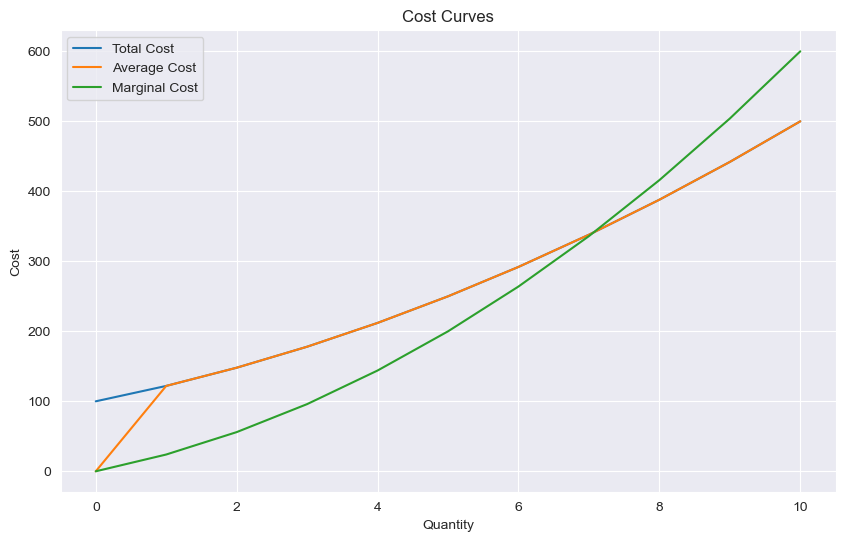

In [7]:
## Problem 2: Marginal Analysis

# Problem Statement:
"""
A firm's total cost (TC) function is given by:
TC = 100 + 20Q + 2Q^2

2.1 Derive expressions for Average Cost (AC) and Marginal Cost (MC).
2.2 Create a matrix of Q, TC, AC, and MC for Q ranging from 0 to 10.
2.3 At what quantity does AC reach its minimum? (Hint: Where MC = AC)
2.4 Plot TC, AC, and MC on the same graph.
"""

# Solution:

def problem_2():
    print("\nProblem 2: Marginal Analysis")
    
    # 2.1 Derive AC and MC
    print("\n2.1 Cost function expressions:")
    print("TC = 100 + 20Q + 2Q^2")
    print("AC = 100/Q + 20 + 2Q")
    print("MC = 20 + 4Q")
    
    # 2.2 Create matrix of costs
    Q = np.arange(11)
    TC = 100 + 20*Q + 2*Q**2
    AC = 100/np.where(Q==0, 1, Q) + 20 + 2*Q  # Avoid division by zero
    MC = 20 + 4*Q
    
    cost_matrix = np.column_stack((Q, TC, AC, MC))
    
    print("\n2.2 Cost Matrix (Q, TC, AC, MC):")
    print(cost_matrix)
    
    # 2.3 Find minimum AC
    min_AC_index = np.argmin(AC[1:]) + 1  # Skip Q=0
    min_AC_quantity = Q[min_AC_index]
    
    print(f"\n2.3 AC reaches its minimum at Q = {min_AC_quantity}")
    
    # 2.4 Plot costs
    plt.figure(figsize=(10, 6))
    plt.plot(Q, TC, label='Total Cost')
    plt.plot(Q, AC * Q, label='Average Cost')
    plt.plot(Q, MC * Q, label='Marginal Cost')
    plt.xlabel('Quantity')
    plt.ylabel('Cost')
    plt.title('Cost Curves')
    plt.legend()
    plt.grid(True)
    plt.show()

problem_2()


In [8]:
## Problem 3: Consumer Theory

# Problem Statement:
"""
Consider a consumer with the utility function:
U = x^0.5 * y^0.5

The prices of goods x and y are Px = $4 and Py = $9 respectively.
The consumer's income is $360.

3.1 Express the budget constraint in matrix form.
3.2 Find the optimal consumption bundle.
3.3 Calculate the marginal rate of substitution (MRS) at the optimal bundle.
3.4 If the price of good x increases to $5, how does it affect the optimal bundle?
"""

# Solution:

def problem_3():
    print("\nProblem 3: Consumer Theory")
    
    # 3.1 Express budget constraint
    A = np.array([[4, 9]])
    B = np.array([360])
    
    print("\n3.1 Budget Constraint Matrix Form:")
    print("A =", A)
    print("B =", B)
    
    # 3.2 Find optimal consumption bundle
    x = 360 / (2 * 4)  # For Cobb-Douglas utility with equal exponents, spend half of income on each good
    y = 360 / (2 * 9)
    
    print(f"\n3.2 Optimal Consumption Bundle:")
    print(f"x = {x}, y = {y}")
    
    # 3.3 Calculate MRS
    MRS = (y / x) * (0.5 / 0.5)  # MRS = (y/x) * (α/β) for U = x^α * y^β
    
    print(f"\n3.3 Marginal Rate of Substitution: {MRS}")
    
    # 3.4 Effect of price change
    new_x = 360 / (2 * 5)
    new_y = 360 / (2 * 9)
    
    print("\n3.4 New Optimal Bundle after Price Increase:")
    print(f"x = {new_x}, y = {new_y}")
    print(f"Change in x: {new_x - x}")
    print(f"Change in y: {new_y - y}")

problem_3()


Problem 3: Consumer Theory

3.1 Budget Constraint Matrix Form:
A = [[4 9]]
B = [360]

3.2 Optimal Consumption Bundle:
x = 45.0, y = 20.0

3.3 Marginal Rate of Substitution: 0.4444444444444444

3.4 New Optimal Bundle after Price Increase:
x = 36.0, y = 20.0
Change in x: -9.0
Change in y: 0.0


In [9]:
from scipy.optimize import minimize


In [10]:
# Problem 4: Production Functions and Returns to Scale

# Problem Statement:
"""
Consider a Cobb-Douglas production function: Q = A * L^α * K^β
Where Q is output, L is labor, K is capital, A is technology, and α and β are output elasticities.

4.1 Express this function in log-linear form.
4.2 If A = 10, α = 0.3, and β = 0.7, create a matrix of Q values for L and K ranging from 1 to 5.
4.3 Calculate the marginal product of labor (MPL) and capital (MPK) when L = 3 and K = 4.
4.4 Determine the returns to scale of this production function.
"""

# Solution:

def problem_4():
    print("\nProblem 4: Production Functions and Returns to Scale")
    
    # 4.1 Log-linear form
    print("\n4.1 Log-linear form:")
    print("log(Q) = log(A) + α*log(L) + β*log(K)")
    
    # 4.2 Create matrix of Q values
    A, alpha, beta = 10, 0.3, 0.7
    L = K = np.arange(1, 6)
    L, K = np.meshgrid(L, K)
    Q = A * L**alpha * K**beta
    
    print("\n4.2 Matrix of Q values:")
    print(Q)
    
    # 4.3 Calculate MPL and MPK
    L, K = 3, 4
    MPL = alpha * A * (L**(alpha-1)) * (K**beta)
    MPK = beta * A * (L**alpha) * (K**(beta-1))
    
    print(f"\n4.3 When L = 3 and K = 4:")
    print(f"Marginal Product of Labor (MPL): {MPL:.2f}")
    print(f"Marginal Product of Capital (MPK): {MPK:.2f}")
    
    # 4.4 Determine returns to scale
    print(f"\n4.4 Returns to Scale:")
    print(f"α + β = {alpha + beta}")
    if alpha + beta == 1:
        print("Constant Returns to Scale")
    elif alpha + beta > 1:
        print("Increasing Returns to Scale")
    else:
        print("Decreasing Returns to Scale")

problem_4()



Problem 4: Production Functions and Returns to Scale

4.1 Log-linear form:
log(Q) = log(A) + α*log(L) + β*log(K)

4.2 Matrix of Q values:
[[10.         12.31144413 13.9038917  15.15716567 16.20656597]
 [16.24504793 20.         22.58693871 24.62288827 26.32764409]
 [21.5766928  26.5640248  30.         32.70415073 34.96840952]
 [26.39015822 32.49009585 36.69259019 40.         42.769384  ]
 [30.85169314 37.98288965 42.89586002 46.76242239 50.        ]]

4.3 When L = 3 and K = 4:
Marginal Product of Labor (MPL): 3.67
Marginal Product of Capital (MPK): 6.42

4.4 Returns to Scale:
α + β = 1.0
Constant Returns to Scale


In [11]:
## Problem 5: Market Structures and Profit Maximization

# Problem Statement:
"""
Consider a monopolist facing the demand function: P = 100 - Q
The monopolist's total cost function is: TC = 20 + 2Q

5.1 Express the profit function in terms of Q.
5.2 Use matrix operations to find the profit-maximizing quantity and price.
5.3 Calculate the monopolist's profit and deadweight loss.
5.4 If this were a perfectly competitive market, what would be the equilibrium quantity and price?
"""

# Solution:

def problem_5():
    print("\nProblem 5: Market Structures and Profit Maximization")
    
    # 5.1 Express profit function
    print("\n5.1 Profit function:")
    print("π = PQ - TC = (100 - Q)Q - (20 + 2Q) = 100Q - Q^2 - 20 - 2Q = -Q^2 + 98Q - 20")
    
    # 5.2 Find profit-maximizing Q and P
    A = np.array([[2, -1], [0, 1]])
    B = np.array([98, 100])
    solution = np.linalg.solve(A, B)
    Q_max, P_max = solution
    
    print(f"\n5.2 Profit-maximizing quantity: {Q_max:.2f}")
    print(f"Profit-maximizing price: ${P_max:.2f}")
    
    # 5.3 Calculate profit and deadweight loss
    profit = P_max * Q_max - (20 + 2 * Q_max)
    CS = 0.5 * (100 - P_max) * Q_max
    PS = profit
    potential_CS = 0.5 * (100 - 2) * 49  # CS if price were equal to MC
    DWL = potential_CS - (CS + PS)
    
    print(f"\n5.3 Monopolist's profit: ${profit:.2f}")
    print(f"Deadweight loss: ${DWL:.2f}")
    
    # 5.4 Perfectly competitive equilibrium
    A_comp = np.array([[1, 1], [1, -1]])
    B_comp = np.array([100, 2])
    solution_comp = np.linalg.solve(A_comp, B_comp)
    Q_comp, P_comp = solution_comp
    
    print(f"\n5.4 Competitive equilibrium quantity: {Q_comp:.2f}")
    print(f"Competitive equilibrium price: ${P_comp:.2f}")

problem_5()


Problem 5: Market Structures and Profit Maximization

5.1 Profit function:
π = PQ - TC = (100 - Q)Q - (20 + 2Q) = 100Q - Q^2 - 20 - 2Q = -Q^2 + 98Q - 20

5.2 Profit-maximizing quantity: 99.00
Profit-maximizing price: $100.00

5.3 Monopolist's profit: $9682.00
Deadweight loss: $-7281.00

5.4 Competitive equilibrium quantity: 51.00
Competitive equilibrium price: $49.00


In [12]:
## Problem 6: Game Theory and Nash Equilibrium

# Problem Statement:
"""
Consider a duopoly market where two firms (A and B) must decide whether to advertise or not.
The payoff matrix (profits for A, B) is as follows:

            Firm B
            No Ad  Ad
Firm A  No Ad  (50, 50)  (40, 60)
        Ad     (60, 40)  (45, 45)

6.1 Express this game in matrix form.
6.2 Determine if there is a dominant strategy for either firm.
6.3 Find the Nash Equilibrium(s) of this game.
6.4 Calculate the total industry profit for each outcome.
"""

# Solution:

def problem_6():
    print("\nProblem 6: Game Theory and Nash Equilibrium")
    
    # 6.1 Express game in matrix form
    payoff_matrix = np.array([
        [(50, 50), (40, 60)],
        [(60, 40), (45, 45)]
    ])
    
    print("\n6.1 Payoff Matrix:")
    print(payoff_matrix)
    
    # 6.2 Determine dominant strategies
    print("\n6.2 Dominant Strategies:")
    
    # For Firm A
    if payoff_matrix[1,0][0] > payoff_matrix[0,0][0] and payoff_matrix[1,1][0] > payoff_matrix[0,1][0]:
        print("Firm A has a dominant strategy: Advertise")
    elif payoff_matrix[0,0][0] > payoff_matrix[1,0][0] and payoff_matrix[0,1][0] > payoff_matrix[1,1][0]:
        print("Firm A has a dominant strategy: Don't Advertise")
    else:
        print("Firm A has no dominant strategy")
    
    # For Firm B
    if payoff_matrix[0,1][1] > payoff_matrix[0,0][1] and payoff_matrix[1,1][1] > payoff_matrix[1,0][1]:
        print("Firm B has a dominant strategy: Advertise")
    elif payoff_matrix[0,0][1] > payoff_matrix[0,1][1] and payoff_matrix[1,0][1] > payoff_matrix[1,1][1]:
        print("Firm B has a dominant strategy: Don't Advertise")
    else:
        print("Firm B has no dominant strategy")
    
    # 6.3 Find Nash Equilibrium(s)
    print("\n6.3 Nash Equilibrium(s):")
    
    def is_nash(i, j):
        return (payoff_matrix[i,j][0] >= payoff_matrix[1-i,j][0] and
                payoff_matrix[i,j][1] >= payoff_matrix[i,1-j][1])
    
    for i in range(2):
        for j in range(2):
            if is_nash(i, j):
                print(f"({['No Ad', 'Ad'][i]}, {['No Ad', 'Ad'][j]})")
    
    # 6.4 Calculate total industry profit
    print("\n6.4 Total Industry Profit for each outcome:")
    for i in range(2):
        for j in range(2):
            total_profit = sum(payoff_matrix[i,j])
            print(f"({['No Ad', 'Ad'][i]}, {['No Ad', 'Ad'][j]}): ${total_profit}")

problem_6()



Problem 6: Game Theory and Nash Equilibrium

6.1 Payoff Matrix:
[[[50 50]
  [40 60]]

 [[60 40]
  [45 45]]]

6.2 Dominant Strategies:
Firm A has a dominant strategy: Advertise
Firm B has a dominant strategy: Advertise

6.3 Nash Equilibrium(s):
(Ad, Ad)

6.4 Total Industry Profit for each outcome:
(No Ad, No Ad): $100
(No Ad, Ad): $100
(Ad, No Ad): $100
(Ad, Ad): $90


In [14]:
## Problem 7: Macroeconomic Policy Analysis (Corrected)

# Problem Statement:
"""
Consider a simple macroeconomic model:
Y = C + I + G + NX
C = a + b(Y - T)
I = e - df
NX = g - hY

Where:
Y: GDP
C: Consumption
I: Investment
G: Government Spending
NX: Net Exports
T: Taxes
f: Interest Rate

Given: a = 200, b = 0.8, d = 50, e = 550, g = 100, h = 0.1

7.1 Express this model in matrix form AY = B.
7.2 Solve for Y given G = 500, T = 400, f = 5.
7.3 Calculate the government spending multiplier.
7.4 If the government increases spending by 100, what is the effect on Y and NX?
"""

# Solution:

def problem_7():
    print("\nProblem 7: Macroeconomic Policy Analysis")
    
    # 7.1 Express model in matrix form
    print("\n7.1 Matrix form AY = B:")
    print("A = [1 - b + bh]")
    print("B = [a - bT + e - df + g + G]")
    
    # 7.2 Solve for Y
    a, b, d, e, g, h = 200, 0.8, 50, 550, 100, 0.1
    G, T, f = 500, 400, 5
    
    A = np.array([[1 - b + b*h]])
    B = np.array([a - b*T + e - d*f + g + G])
    
    Y = np.linalg.solve(A, B)[0]
    
    print(f"\n7.2 GDP (Y) = {Y:.2f}")
    
    # 7.3 Calculate government spending multiplier
    multiplier = 1 / (1 - b + b*h)
    
    print(f"\n7.3 Government Spending Multiplier: {multiplier:.2f}")
    
    # 7.4 Effect of increase in government spending
    delta_G = 100
    delta_Y = multiplier * delta_G
    delta_NX = -h * delta_Y
    
    print(f"\n7.4 Effect of {delta_G} increase in G:")
    print(f"Change in Y: {delta_Y:.2f}")
    print(f"Change in NX: {delta_NX:.2f}")

    # Additional analysis: Components of GDP
    C = a + b * (Y - T)
    I = e - d * f
    NX = g - h * Y
    
    print("\nComponents of GDP:")
    print(f"Consumption (C): {C:.2f}")
    print(f"Investment (I): {I:.2f}")
    print(f"Government Spending (G): {G:.2f}")
    print(f"Net Exports (NX): {NX:.2f}")
    print(f"Sum of Components: {C + I + G + NX:.2f}")

problem_7()


Problem 7: Macroeconomic Policy Analysis

7.1 Matrix form AY = B:
A = [1 - b + bh]
B = [a - bT + e - df + g + G]

7.2 GDP (Y) = 2785.71

7.3 Government Spending Multiplier: 3.57

7.4 Effect of 100 increase in G:
Change in Y: 357.14
Change in NX: -35.71

Components of GDP:
Consumption (C): 2108.57
Investment (I): 300.00
Government Spending (G): 500.00
Net Exports (NX): -178.57
Sum of Components: 2730.00



Problem 7: Macroeconomic Policy Analysis

7.1 Matrix form AY = B:
A = [1 - b + bh]
B = [a - bT + e - df + g + G]

7.2 GDP (Y) = 2785.71

7.3 Government Spending Multiplier: 3.57

7.4 Effect of 100 increase in G:
Change in Y: 357.14
Change in NX: -35.71

Components of GDP:
Consumption (C): 2108.57
Investment (I): 300.00
Government Spending (G): 500.00
Net Exports (NX): -178.57
Sum of Components: 2730.00


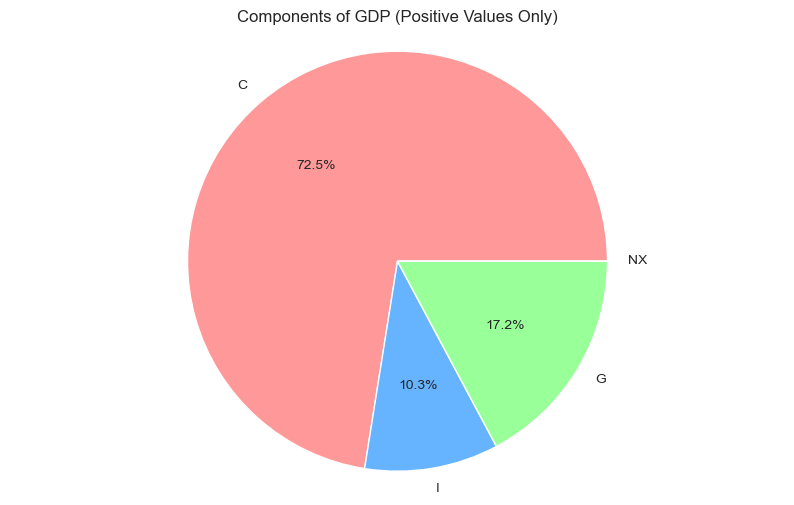

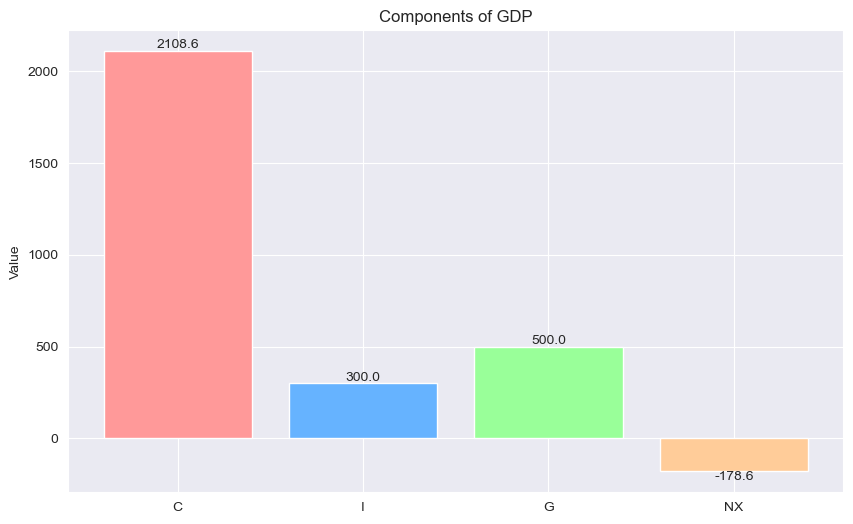

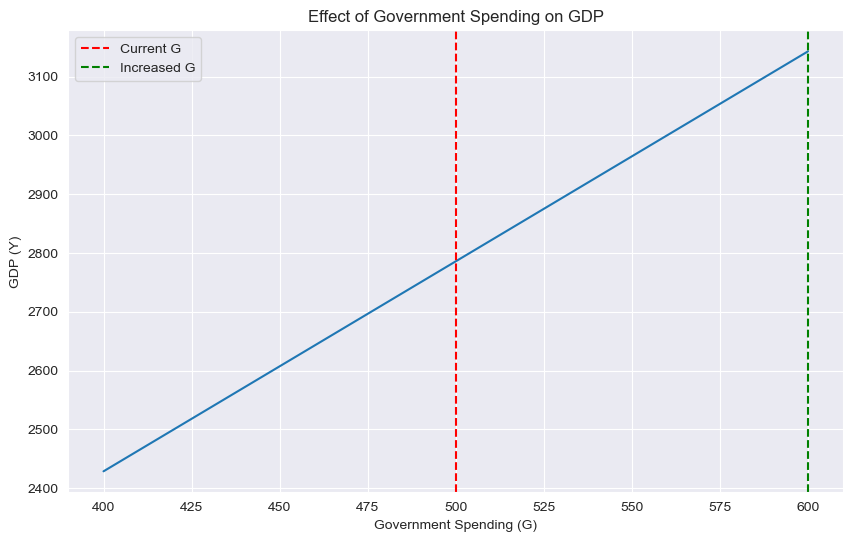

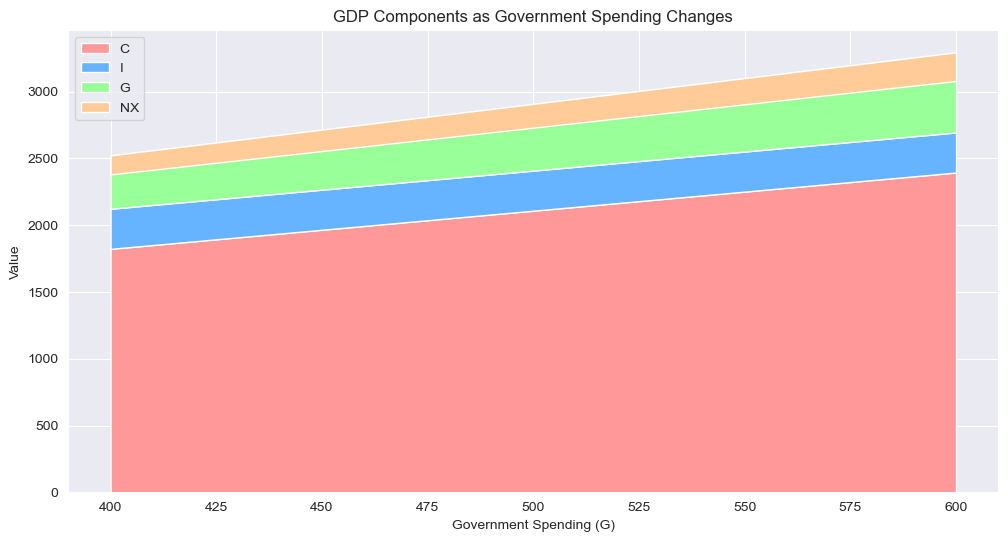

In [16]:
# Solution:

def problem_7():
    print("\nProblem 7: Macroeconomic Policy Analysis")
    
    # 7.1 Express model in matrix form
    print("\n7.1 Matrix form AY = B:")
    print("A = [1 - b + bh]")
    print("B = [a - bT + e - df + g + G]")
    
    # 7.2 Solve for Y
    a, b, d, e, g, h = 200, 0.8, 50, 550, 100, 0.1
    G, T, f = 500, 400, 5
    
    A = np.array([[1 - b + b*h]])
    B = np.array([a - b*T + e - d*f + g + G])
    
    Y = np.linalg.solve(A, B)[0]
    
    print(f"\n7.2 GDP (Y) = {Y:.2f}")
    
    # 7.3 Calculate government spending multiplier
    multiplier = 1 / (1 - b + b*h)
    
    print(f"\n7.3 Government Spending Multiplier: {multiplier:.2f}")
    
    # 7.4 Effect of increase in government spending
    delta_G = 100
    delta_Y = multiplier * delta_G
    delta_NX = -h * delta_Y
    
    print(f"\n7.4 Effect of {delta_G} increase in G:")
    print(f"Change in Y: {delta_Y:.2f}")
    print(f"Change in NX: {delta_NX:.2f}")

    # Calculate components of GDP
    C = a + b * (Y - T)
    I = e - d * f
    NX = g - h * Y
    
    print("\nComponents of GDP:")
    print(f"Consumption (C): {C:.2f}")
    print(f"Investment (I): {I:.2f}")
    print(f"Government Spending (G): {G:.2f}")
    print(f"Net Exports (NX): {NX:.2f}")
    print(f"Sum of Components: {C + I + G + NX:.2f}")

    # 7.5 Visualizations

    # Pie chart of GDP components (excluding negative values)
    positive_components = [max(0, x) for x in [C, I, G, NX]]
    labels = ['C', 'I', 'G', 'NX']
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
    
    plt.figure(figsize=(10, 6))
    plt.pie(positive_components, labels=labels, colors=colors, autopct=lambda pct: f'{pct:.1f}%' if pct > 0 else '')
    plt.title('Components of GDP (Positive Values Only)')
    plt.axis('equal')
    plt.show()

    # Bar chart of GDP components
    plt.figure(figsize=(10, 6))
    plt.bar(labels, [C, I, G, NX], color=colors)
    plt.title('Components of GDP')
    plt.ylabel('Value')
    for i, v in enumerate([C, I, G, NX]):
        plt.text(i, v, f'{v:.1f}', ha='center', va='bottom' if v > 0 else 'top')
    plt.show()

    # Line graph showing effect of changing G
    G_values = np.linspace(400, 600, 50)
    Y_values = []
    for G_val in G_values:
        B = np.array([a - b*T + e - d*f + g + G_val])
        Y_val = np.linalg.solve(A, B)[0]
        Y_values.append(Y_val)

    plt.figure(figsize=(10, 6))
    plt.plot(G_values, Y_values)
    plt.title('Effect of Government Spending on GDP')
    plt.xlabel('Government Spending (G)')
    plt.ylabel('GDP (Y)')
    plt.axvline(x=500, color='r', linestyle='--', label='Current G')
    plt.axvline(x=600, color='g', linestyle='--', label='Increased G')
    plt.legend()
    plt.show()

    # Stacked area chart of GDP components as G changes
    C_values = []
    I_values = [I] * len(G_values)  # I is constant
    NX_values = []

    for Y_val in Y_values:
        C_values.append(a + b * (Y_val - T))
        NX_values.append(g - h * Y_val)

    plt.figure(figsize=(12, 6))
    plt.stackplot(G_values, C_values, I_values, G_values, NX_values, 
                  labels=['C', 'I', 'G', 'NX'], colors=colors)
    plt.title('GDP Components as Government Spending Changes')
    plt.xlabel('Government Spending (G)')
    plt.ylabel('Value')
    plt.legend(loc='upper left')
    plt.show()

problem_7()
